In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble, preprocessing, metrics, svm
from sklearn.model_selection import cross_validate, train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import seaborn as sns

In [2]:
data = pd.read_csv('Training Dataset.csv')

In [3]:
data.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data.columns[1:31]

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [5]:
data_X = data[data.columns[1:31]]
data_y = data.Result
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size = 0.2)

In [6]:
forest = ensemble.RandomForestClassifier(n_estimators=100)
forest_fit = forest.fit(train_X, train_y)
test_y_predicted = forest.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.9746720940750792


In [7]:
metrics.confusion_matrix(test_y, test_y_predicted)

array([[ 932,   30],
       [  26, 1223]], dtype=int64)

In [8]:
print(metrics.classification_report(test_y, test_y_predicted))

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       962
           1       0.98      0.98      0.98      1249

   micro avg       0.97      0.97      0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [9]:
# forest.feature_importances_
feature_imp_forest = pd.DataFrame()
feature_imp_forest['import'] = forest.feature_importances_
feature_imp_forest['feature_name'] = test_X.columns

In [10]:
feature_imp_forest = feature_imp_forest.sort_values('import',ascending=False).reset_index(drop=True)

In [11]:
feature_imp_forest

,import,feature_name
0,0.323923,SSLfinal_State
1,0.222678,URL_of_Anchor
2,0.086280,web_traffic
3,0.063610,having_Sub_Domain
4,0.044142,Prefix_Suffix
5,0.040864,Links_in_tags
6,0.021734,SFH
7,0.021232,Request_URL
8,0.019474,Links_pointing_to_page
9,0.017135,Domain_registeration_length


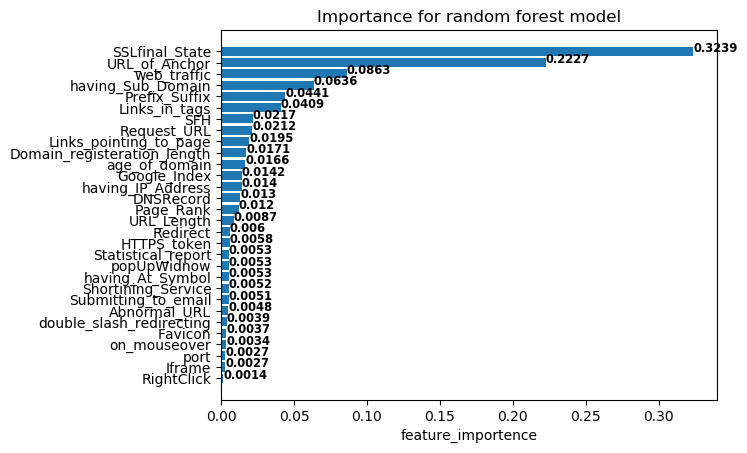

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()
num_to_show = 30

# Example data
feature = feature_imp_forest['feature_name'][0:num_to_show]
y_pos = np.arange(len(feature))
importence = feature_imp_forest['import'][0:num_to_show]


ax.barh(y_pos, importence)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('feature_importence')
ax.set_title('Importance for random forest model')

for i, v in enumerate(importence):
    v = round(v,4)
    ax.text(v , i-0.01 , str(v), color='black', fontweight='bold',size='small')

plt.show()

# Xgb

In [13]:
xgbc = XGBClassifier()
xgbc.fit(train_X, train_y)
print(xgbc.score(test_X, test_y))

0.9507010402532791


In [14]:
test_y_predict_x = xgbc.predict(test_X)

In [15]:
metrics.confusion_matrix(test_y, test_y_predict_x)

array([[ 900,   62],
       [  47, 1202]], dtype=int64)

In [16]:
print(metrics.classification_report(test_y, test_y_predict_x))

              precision    recall  f1-score   support

          -1       0.95      0.94      0.94       962
           1       0.95      0.96      0.96      1249

   micro avg       0.95      0.95      0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [17]:
# xgbc.feature_importances_
feature_imp_xgb = pd.DataFrame()
feature_imp_xgb['import'] = xgbc.feature_importances_
feature_imp_xgb['feature_name'] = test_X.columns

In [18]:
feature_imp_xgb = feature_imp_xgb.sort_values('import',ascending=False).reset_index(drop=True)

In [19]:
feature_imp_xgb

,import,feature_name
0,0.492205,SSLfinal_State
1,0.089686,URL_of_Anchor
2,0.044577,Links_in_tags
3,0.038780,SFH
4,0.037248,Prefix_Suffix
5,0.034938,having_Sub_Domain
6,0.034807,web_traffic
7,0.016403,having_IP_Address
8,0.016084,DNSRecord
9,0.015740,Google_Index


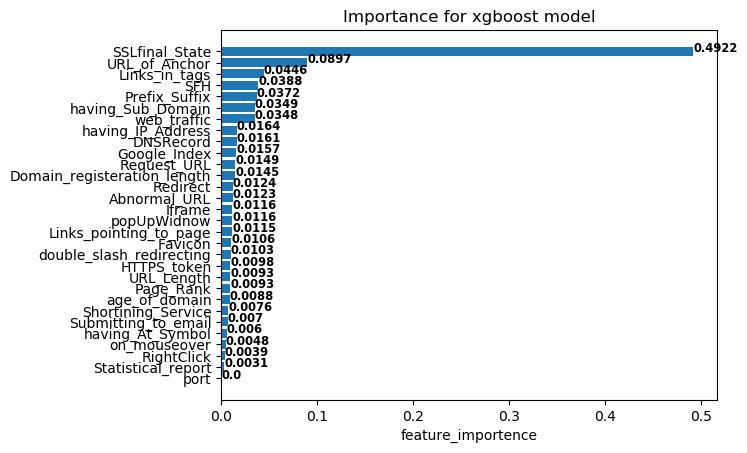

In [20]:
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()
num_to_show = 30

# Example data
feature = feature_imp_xgb['feature_name'][0:num_to_show]
y_pos = np.arange(len(feature))
importence = feature_imp_xgb['import'][0:num_to_show]


ax.barh(y_pos, importence)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('feature_importence')
ax.set_title('Importance for xgboost model')

for i, v in enumerate(importence):
    v = round(v,4)
    ax.text(v , i-0.01 , str(v), color='black', fontweight='bold',size='small')

plt.show()

# svm

In [21]:
svc = svm.SVC(gamma='auto')
svc_fit = svc.fit(train_X, train_y)
test_y_predicted_svm = svc.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted_svm)
print(accuracy)

# 跑太久

0.945273631840796


In [22]:
metrics.confusion_matrix(test_y, test_y_predicted_svm)

array([[ 891,   71],
       [  50, 1199]], dtype=int64)

In [23]:
print(metrics.classification_report(test_y, test_y_predicted_svm))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       962
           1       0.94      0.96      0.95      1249

   micro avg       0.95      0.95      0.95      2211
   macro avg       0.95      0.94      0.94      2211
weighted avg       0.95      0.95      0.95      2211



In [24]:
svc.support_vectors_

array([[ 1., -1.,  1., ...,  1.,  1., -1.],
       [ 1., -1.,  1., ...,  1.,  0.,  1.],
       [ 1., -1.,  1., ...,  1.,  0.,  1.],
       ...,
       [ 1., -1.,  1., ...,  1.,  1.,  1.],
       [ 1., -1.,  1., ...,  1.,  0.,  1.],
       [-1., -1., -1., ..., -1.,  1.,  1.]])

In [29]:
svc.verbose

False

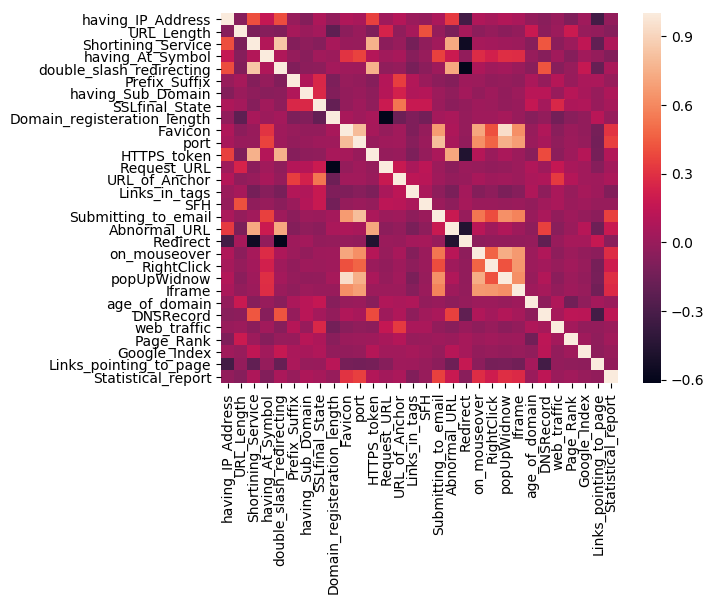

In [30]:
corr = train_X.corr()

# plot the heatmap
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

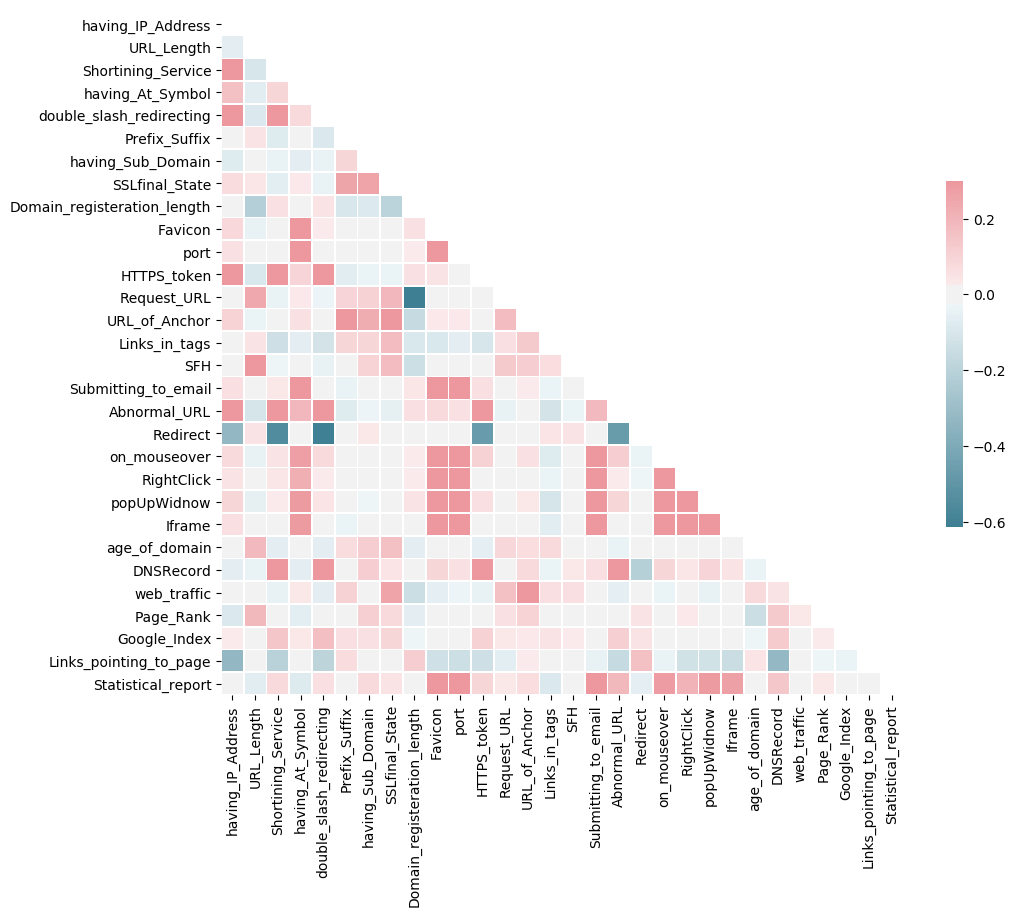

In [40]:
# Compute the correlation matrix
# corr = train_X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# decisition tree

In [31]:
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
from sklearn.metrics import accuracy_score

In [32]:
tree = DTC(criterion='entropy') 
tree.fit(train_X, train_y)
test_y_predicted_dct = tree.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted_dct)
print(accuracy)

0.9678878335594754


In [33]:
metrics.confusion_matrix(test_y, test_y_predicted_dct)

array([[ 927,   35],
       [  36, 1213]], dtype=int64)

In [34]:
print(metrics.classification_report(test_y, test_y_predicted_dct))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       962
           1       0.97      0.97      0.97      1249

   micro avg       0.97      0.97      0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [35]:
tree.feature_importances_
feature_imp_dct = pd.DataFrame()
feature_imp_dct['import'] = tree.feature_importances_
feature_imp_dct['feature_name'] = test_X.columns

In [36]:
feature_imp_dct = feature_imp_dct.sort_values('import',ascending=False).reset_index(drop=True)

In [37]:
feature_imp_dct

,import,feature_name
0,0.510573,SSLfinal_State
1,0.163643,URL_of_Anchor
2,0.047853,web_traffic
3,0.042094,Links_in_tags
4,0.031310,having_Sub_Domain
5,0.025029,Prefix_Suffix
6,0.022713,Links_pointing_to_page
7,0.016068,Request_URL
8,0.015914,SFH
9,0.013871,Google_Index


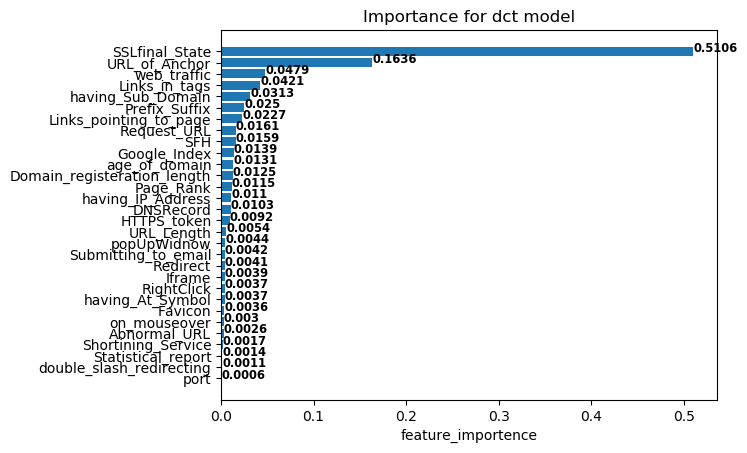

In [38]:
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()
num_to_show = 30

# Example data
feature = feature_imp_dct['feature_name'][0:num_to_show]
y_pos = np.arange(len(feature))
importence = feature_imp_dct['import'][0:num_to_show]


ax.barh(y_pos, importence)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('feature_importence')
ax.set_title('Importance for dct model')

for i, v in enumerate(importence):
    v = round(v,4)
    ax.text(v , i-0.01 , str(v), color='black', fontweight='bold',size='small')

plt.show()

In [42]:
pca = PCA(n_components=10)

In [43]:
pca.fit(test_X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
print(pca.explained_variance_ratio_)

[0.15547662 0.11688521 0.1126054  0.06719436 0.06554234 0.05196689
 0.04388609 0.03852727 0.03701735 0.03249038]


In [47]:
print(pca.explained_variance_ratio_)

[2.71467583 2.04085639 1.9661294  1.1732368  1.14439196 0.90735992
 0.76626632 0.67269956 0.6463358  0.56729332]


TypeError: bar() missing 1 required positional argument: 'height'